In [1]:
import os
os.chdir("S:/spotify streaming data/my_spotify_data/Spotify Account Data")


In [3]:
import os
print(os.getcwd())  # This should print your specified directory
print(os.listdir()) # This should list all files in the directory


S:\spotify streaming data\my_spotify_data\Spotify Account Data
['DuoNewFamily.json', 'Follow.json', 'Identifiers.json', 'Identity.json', 'Inferences.json', 'Marquee.json', 'Payments.json', 'Playlist1.json', 'Read_Me_First.pdf', 'SearchQueries.json', 'StreamingHistory_music_0.json', 'StreamingHistory_podcast_0.json', 'UserAddress.json', 'Userdata.json', 'Wrapped2024.json', 'YourLibrary.json', 'YourSoundCapsule.json']


In [5]:
import json
import pandas as pd

# Correct file path
file_path = r"S:\spotify streaming data\my_spotify_data\Spotify Account Data\StreamingHistory_music_0.json"

# Load JSON file
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert JSON data into DataFrame
df = pd.DataFrame(data)

# Validate DataFrame structure
print(df.head())  # Check the first few rows

# Ensure necessary columns exist before proceeding
required_columns = {'endTime', 'msPlayed', 'artistName', 'trackName'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Missing required columns in streaming history: {required_columns - set(df.columns)}")

# Convert timestamp and calculate minutes played
df['endTime'] = pd.to_datetime(df['endTime'])
df['minutesPlayed'] = df['msPlayed'] / (1000 * 60)

# Print success message
print("Data loaded successfully!")


            endTime       artistName             trackName  msPlayed
0  2024-02-22 23:10   Harshdeep Kaur                   Uff     69056
1  2024-02-23 05:43          Raftaar  Baby Marvake Maanegi    187541
2  2024-02-23 05:47  Neeraj Shridhar    Maine Tujhko Dekha    207393
3  2024-02-23 05:51     Amit Trivedi       Shaam Shaandaar    237463
4  2024-02-23 05:55   Vishal-Shekhar                  Vele    230546
Data loaded successfully!


In [7]:
import zipfile
import os
import json
import pandas as pd
import requests
from textblob import TextBlob
from collections import Counter
from sklearn.model_selection import train_test_split
from implicit.als import AlternatingLeastSquares
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import seaborn as sns
import lyricsgenius
import time


In [9]:
import pandas as pd
import zipfile
import os

# Step 1: Extract ZIP file
zip_file_path = r'S:\spotify streaming data\my_spotify_data.zip'  # Using raw string
extracted_folder = r'S:\spotify streaming data\my_spotify_data'   # Using raw string

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Step 2: Verify the extracted files and list them
extracted_files = os.listdir(extracted_folder)
print("Extracted files:", extracted_files)

# Step 3: Load the Spotify streaming history CSV (assuming it's called 'StreamingHistory.csv')
# Check the exact name of the CSV file extracted and adjust accordingly
streaming_history_path = os.path.join(extracted_folder, 'StreamingHistory.csv')  # Ensure this matches


Extracted files: ['Spotify Account Data']


In [11]:
# Step 1: Explore the folder 'Spotify Account Data' to see what it contains
account_data_folder = os.path.join(extracted_folder, 'Spotify Account Data')

# List files in 'Spotify Account Data' folder
account_data_files = os.listdir(account_data_folder)
print("Account data folder files:", account_data_files)


Account data folder files: ['DuoNewFamily.json', 'Follow.json', 'Identifiers.json', 'Identity.json', 'Inferences.json', 'Marquee.json', 'Payments.json', 'Playlist1.json', 'Read_Me_First.pdf', 'SearchQueries.json', 'StreamingHistory_music_0.json', 'StreamingHistory_podcast_0.json', 'UserAddress.json', 'Userdata.json', 'Wrapped2024.json', 'YourLibrary.json', 'YourSoundCapsule.json']


In [13]:
import json

# Path to the music streaming history file
streaming_history_music_path = os.path.join(account_data_folder, 'StreamingHistory_music_0.json')

# Load the JSON file
with open(streaming_history_music_path, 'r', encoding='utf-8') as f:
    music_data = json.load(f)

# Display the first few entries to inspect the data
print(music_data[:5])  # Adjust the number if you need more rows


[{'endTime': '2024-02-22 23:10', 'artistName': 'Harshdeep Kaur', 'trackName': 'Uff', 'msPlayed': 69056}, {'endTime': '2024-02-23 05:43', 'artistName': 'Raftaar', 'trackName': 'Baby Marvake Maanegi', 'msPlayed': 187541}, {'endTime': '2024-02-23 05:47', 'artistName': 'Neeraj Shridhar', 'trackName': 'Maine Tujhko Dekha', 'msPlayed': 207393}, {'endTime': '2024-02-23 05:51', 'artistName': 'Amit Trivedi', 'trackName': 'Shaam Shaandaar', 'msPlayed': 237463}, {'endTime': '2024-02-23 05:55', 'artistName': 'Vishal-Shekhar', 'trackName': 'Vele', 'msPlayed': 230546}]


In [15]:
import pandas as pd

# Convert the loaded JSON data into a DataFrame
df_music = pd.DataFrame(music_data)

# Display the first few rows to verify the structure
print(df_music.head())


            endTime       artistName             trackName  msPlayed
0  2024-02-22 23:10   Harshdeep Kaur                   Uff     69056
1  2024-02-23 05:43          Raftaar  Baby Marvake Maanegi    187541
2  2024-02-23 05:47  Neeraj Shridhar    Maine Tujhko Dekha    207393
3  2024-02-23 05:51     Amit Trivedi       Shaam Shaandaar    237463
4  2024-02-23 05:55   Vishal-Shekhar                  Vele    230546


In [17]:
# Convert msPlayed from milliseconds to minutes
df_music['minutesPlayed'] = df_music['msPlayed'] / 60000  # Convert to minutes

# Drop rows with missing values in essential columns (if any)
df_music.dropna(subset=['trackName', 'artistName'], inplace=True)

# Display the cleaned DataFrame
print(df_music[['trackName', 'artistName', 'minutesPlayed']].head())


              trackName       artistName  minutesPlayed
0                   Uff   Harshdeep Kaur       1.150933
1  Baby Marvake Maanegi          Raftaar       3.125683
2    Maine Tujhko Dekha  Neeraj Shridhar       3.456550
3       Shaam Shaandaar     Amit Trivedi       3.957717
4                  Vele   Vishal-Shekhar       3.842433


In [19]:
import pandas as pd
import lyricsgenius
import jiosaavn
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import os
import json

#Initialize Genius API
GENIUS_API_KEY = "pmD2N4y2YG9PLXszf3XXOPXFUWHkdM5jbH7xbBfpXtSzUudNiNaPK0DzLmRnMsgz"
genius = lyricsgenius.Genius("pmD2N4y2YG9PLXszf3XXOPXFUWHkdM5jbH7xbBfpXtSzUudNiNaPK0DzLmRnMsgz")

def scrape_lyrics(artist, track):
    """Scrape lyrics from lyrics websites as a last resort."""
    search_query = f"{track} {artist} lyrics"
    search_url = f"https://www.lyricsify.com/?search={search_query.replace(' ', '+')}"

    try:
        response = requests.get(search_url, headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(response.text, "html.parser")

        #Step 2: Find the first lyrics page link (corrected)
        lyrics_page_link = soup.find("a", href=True, string=track)  # 🔥 Corrected to 'string='

        if lyrics_page_link:
            lyrics_url = "https://www.lyricsify.com" + lyrics_page_link["href"]
            lyrics_response = requests.get(lyrics_url, headers={"User-Agent": "Mozilla/5.0"})
            lyrics_soup = BeautifulSoup(lyrics_response.text, "html.parser")

            #Step 3: Extract lyrics (adjust selector based on website structure)
            lyrics_div = lyrics_soup.find("div", class_="lyrics")
            if lyrics_div:
                return lyrics_div.get_text("\n")

    except Exception as e:
        print(f"❌ Web Scraping Error for {track} by {artist}: {e}")

    return "Lyrics not found"

def get_lyrics(artist, track):
    """Fetch lyrics using Genius API first, then JioSaavn API, then try web scraping."""
    
    #Step 1: Try Genius API
    try:
        song = genius.search_song(track, artist)
        if song and isinstance(song.lyrics, str):  
            return song.lyrics  
    except Exception as e:
        print(f"❌ Genius API Error for {track} by {artist}: {e}")

    #Step 2: Try JioSaavn API
    try:
        search_results = jiosaavn.searchSong(f"{track} {artist}")
        if search_results:
            song_data = search_results[0]
            lyrics_data = jiosaavn.lyrics(song_data['id'])

            if isinstance(lyrics_data, dict) and 'lyrics' in lyrics_data:
                return lyrics_data['lyrics']
    except Exception as e:
        print(f"❌ JioSaavn API Error for {track} by {artist}: {e}")

    #Step 3: Try Web Scraping
    scraped_lyrics = scrape_lyrics(artist, track)
    if scraped_lyrics != "Lyrics not found":
        return scraped_lyrics

    #Step 4:all fail, return "Lyrics not found"
    return "Lyrics not found"

#Correct JSON file path
streaming_history_path = r'S:/spotify streaming data/my_spotify_data/Spotify Account Data/StreamingHistory_music_0.json'

# Check if the file exists
if not os.path.exists(streaming_history_path):
    print(f"❌ File not found: {streaming_history_path}")
else:
    #Load your actual Spotify streaming history from the JSON file
    with open(streaming_history_path, 'r', encoding='utf-8') as f:
        streaming_history = json.load(f)

    #Convert JSON data into a pandas DataFrame
    df = pd.DataFrame(streaming_history)

    #Ensure the DataFrame has the expected columns and display the first few rows
    print("Dataframe loaded successfully.")
    print(df.head())

    #Convert msPlayed (in milliseconds) to minutes
    df['minutesPlayed'] = df['msPlayed'] / 60000  # msPlayed to minutes

    #Aggregate the data and sort top songs by total minutes played
    df_top_songs = df.groupby(['artistName', 'trackName'])['minutesPlayed'].sum().reset_index()
    df_top_songs = df_top_songs.sort_values(by='minutesPlayed', ascending=False).head(10) 

    #Apply get_lyrics function to the top songs
    df_top_songs['lyrics'] = df_top_songs.apply(lambda x: get_lyrics(x['artistName'], x['trackName']), axis=1)

    #Debugging: Show missing lyrics
    missing_lyrics = df_top_songs[df_top_songs['lyrics'] == "Lyrics not found"]
    print("\n Songs with missing lyrics:\n", missing_lyrics[['artistName', 'trackName']])

    #Sentiment Analysis Function
    def analyze_sentiment(lyrics):
        if not isinstance(lyrics, str):  #Ensure lyrics are a string before passing to TextBlob
            return 0.0  
        return TextBlob(lyrics).sentiment.polarity

    #Apply Sentiment Analysis
    df_top_songs['sentiment'] = df_top_songs['lyrics'].apply(analyze_sentiment)

    #Print Final DataFrame with top songs
    print(df_top_songs[['artistName', 'trackName', 'lyrics', 'sentiment']])


Dataframe loaded successfully.
            endTime       artistName             trackName  msPlayed
0  2024-02-22 23:10   Harshdeep Kaur                   Uff     69056
1  2024-02-23 05:43          Raftaar  Baby Marvake Maanegi    187541
2  2024-02-23 05:47  Neeraj Shridhar    Maine Tujhko Dekha    207393
3  2024-02-23 05:51     Amit Trivedi       Shaam Shaandaar    237463
4  2024-02-23 05:55   Vishal-Shekhar                  Vele    230546
Searching for "Espresso" by Sabrina Carpenter...
Done.
Searching for "Uff" by Harshdeep Kaur...
Done.
Searching for "we can't be friends (wait for your love)" by Ariana Grande...
Done.
Searching for "Alisha" by Salim–Sulaiman...
No results found for: 'Alisha Salim–Sulaiman'
Searching for "Dil Mere" by The Local Train...
Done.
Searching for "Vachindamma" by Sid Sriram...
No results found for: 'Vachindamma Sid Sriram'
Searching for "Out of My League" by Fitz and The Tantrums...
Done.
Searching for "Jhak Maar Ke" by Pritam...
No results found for: 'Jha

In [25]:
# Step 4: Collaborative Filtering for Artist Recommendation
print("Columns in df:", df.columns)

#Ensure 'user_id' column exists before pivoting
if 'user_id' not in df.columns:
    df['user_id'] = df.groupby(['artistName', 'trackName']).ngroup()

#Use 'user_id' instead of 'endTime' for pivoting
user_artist_matrix = df.pivot_table(index='artistName', columns='user_id', values='minutesPlayed', fill_value=0)
user_artist_sparse = sparse.csr_matrix(user_artist_matrix.values)

#Train the ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=20)
model.fit(user_artist_sparse)

def recommend_artist(artist_name, model, artist_list, n=5):
    if artist_name not in artist_list:
        return []
    artist_idx = artist_list.index(artist_name)
    recommendations = model.similar_items(artist_idx, N=n)
    return [artist_list[int(i[0])] for i in recommendations]  # Ensure index is an integer

artist_list = list(user_artist_matrix.index)
df_top_artists = df.groupby("artistName")["minutesPlayed"].sum().reset_index()
top_artist = df_top_artists.sort_values(by="minutesPlayed", ascending=False).iloc[0]['artistName']
recommended_artists = recommend_artist(top_artist, model, artist_list)

#Display Recommendations
print("Recommended Artists:", recommended_artists)


Columns in df: Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'minutesPlayed',
       'user_id'],
      dtype='object')


  0%|          | 0/20 [00:00<?, ?it/s]

Recommended Artists: ['Pritam', '10CM']


In [23]:
from threadpoolctl import threadpool_limits
threadpool_limits(1, "blas")



In [27]:
import pandas as pd  #Import pandas
from datetime import datetime, timedelta  #Import datetime

#Check 'endTime' exists before processing
if 'endTime' in df.columns:
    df['endTime'] = pd.to_datetime(df['endTime'])

    #Filter the last 6 months of data
    six_months_ago = datetime.now() - timedelta(days=180)
    df = df[df['endTime'] >= six_months_ago]
else:
    print("⚠️ Warning: 'endTime' column not found in the dataset.")

#Create new scoring system based on plays, skips, and likes
df['play_count'] = df.groupby(['artistName', 'trackName'])['minutesPlayed'].transform(len)

#Check if 'skipped' exists before applying penalty
if 'skipped' in df.columns:
    df['weighted_minutesPlayed'] = df['minutesPlayed'] * (1 - df['skipped'])
else:
    df['weighted_minutesPlayed'] = df['minutesPlayed'] 

#Check if 'liked' exists before boosting scores
if 'liked' in df.columns:
    df['boosted_score'] = df['weighted_minutesPlayed'] * (1 + df['liked'])
else:
    df['boosted_score'] = df['weighted_minutesPlayed']

#Display first few rows to verify changes
print(df.head())


                 endTime         artistName  \
5787 2024-09-05 11:30:00            Tinashe   
5788 2024-09-05 11:33:00  Sabrina Carpenter   
5789 2024-09-05 11:33:00            Tinashe   
5790 2024-09-05 11:34:00             Beneld   
5791 2024-09-05 11:36:00       Kristen Bell   

                                              trackName  msPlayed  \
5787                                              Nasty     43932   
5788                                            Feather     16075   
5789                                              Nasty    131893   
5790                                               FEEL     48413   
5791  Love Is an Open Door - From "Frozen"/Soundtrac...    127133   

      minutesPlayed  user_id  play_count  weighted_minutesPlayed  \
5787       0.732200     2075          22                0.732200   
5788       0.267917     1644           4                0.267917   
5789       2.198217     2075          22                2.198217   
5790       0.806883      379  

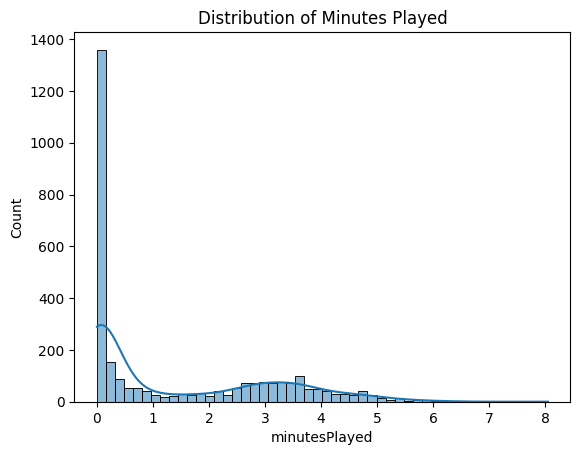

Top Songs Sentiment:
                 artistName                                 trackName  \
1643      Sabrina Carpenter                                  Espresso   
762          Harshdeep Kaur                                       Uff   
227           Ariana Grande  we can't be friends (wait for your love)   
1705         Salim–Sulaiman                                    Alisha   
2032        The Local Train                                  Dil Mere   
1836             Sid Sriram                               Vachindamma   
688   Fitz and The Tantrums                          Out of My League   
1466                 Pritam                              Jhak Maar Ke   
243            Arijit Singh                                Shaayraana   
718             Gopi Sundar        Maangalyam - From "Bangalore Days"   

      sentiment  
1643   0.010962  
762   -0.448718  
227    0.438889  
1705   0.000000  
2032   0.000000  
1836   0.000000  
688    0.483473  
1466   0.000000  
243    0.0000

In [29]:
sns.histplot(df['minutesPlayed'], bins=50, kde=True)
plt.title("Distribution of Minutes Played")
plt.show()

print("Top Songs Sentiment:")
print(df_top_songs[['artistName', 'trackName', 'sentiment']])

if 'endTime' in df.columns:
    print("Recommended Artists:", recommended_artists)



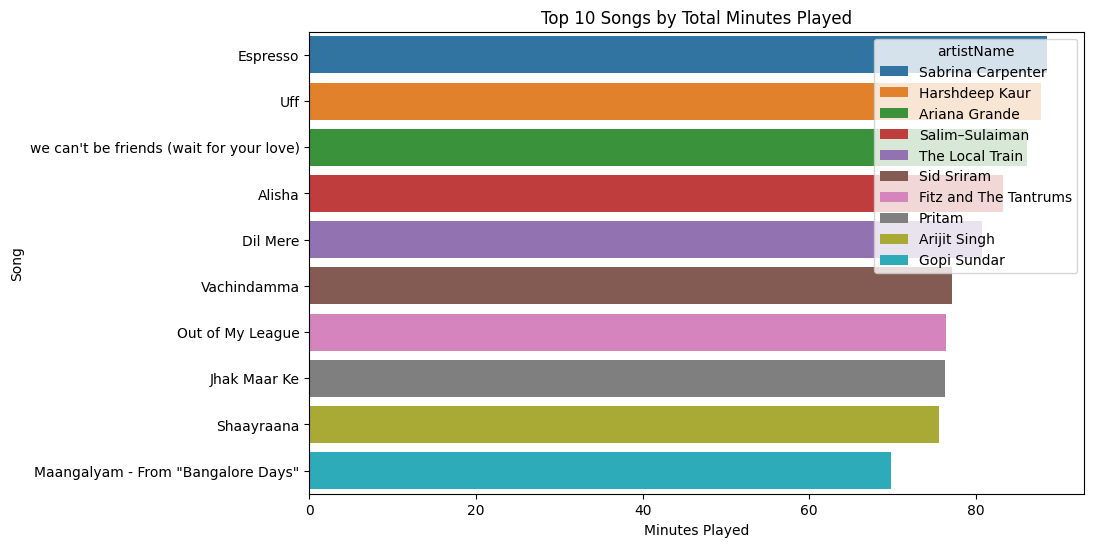

In [31]:
top_songs = df_top_songs[['artistName', 'trackName', 'minutesPlayed']].sort_values(by='minutesPlayed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='minutesPlayed', y='trackName', data=top_songs, hue='artistName', dodge=False)
plt.title('Top 10 Songs by Total Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Song')
plt.show()




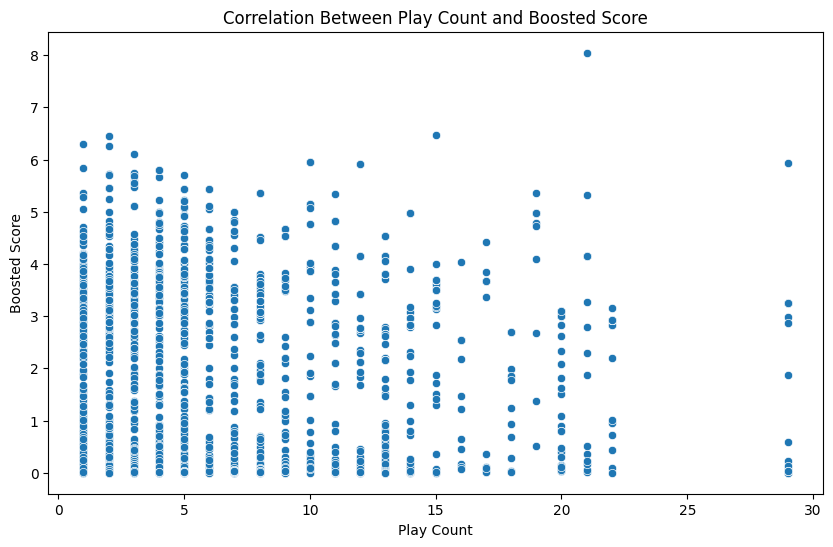

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='play_count', y='boosted_score', data=df)
plt.title('Correlation Between Play Count and Boosted Score')
plt.xlabel('Play Count')
plt.ylabel('Boosted Score')
plt.show()



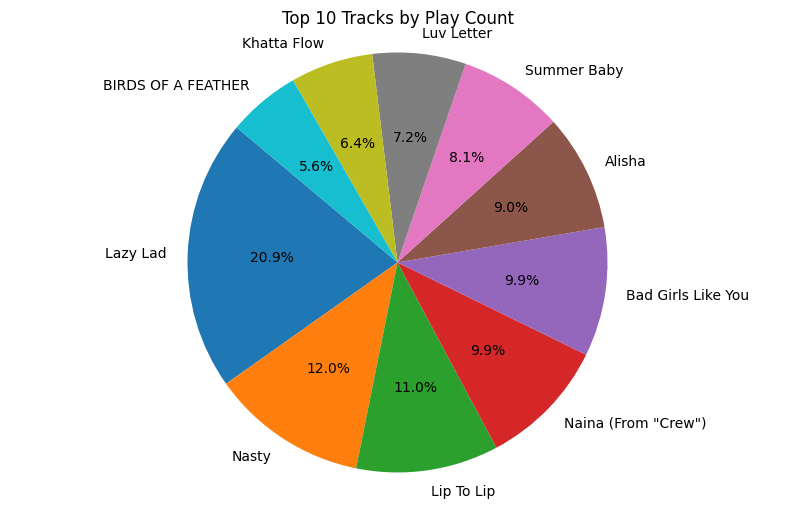

In [49]:
track_play_counts = df.groupby('trackName')['play_count'].sum().reset_index().sort_values(by='play_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.pie(track_play_counts['play_count'], labels=track_play_counts['trackName'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Tracks by Play Count')
plt.axis('equal')
plt.show()


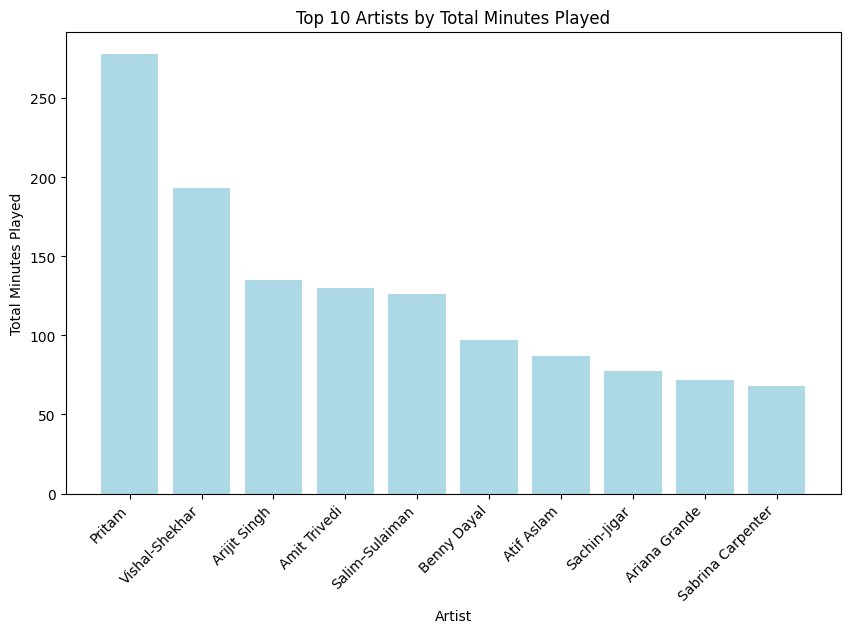

In [39]:
# Aggregate data by artist and total minutes played
df_top_artists = df.groupby('artistName')['minutesPlayed'].sum().reset_index()
df_top_artists_sorted = df_top_artists.sort_values(by='minutesPlayed', ascending=False).head(10)

# Plot top 10 artists by total minutes played
plt.figure(figsize=(10, 6))
plt.bar(df_top_artists_sorted['artistName'], df_top_artists_sorted['minutesPlayed'], color='lightblue')
plt.xlabel('Artist')
plt.ylabel('Total Minutes Played')
plt.title('Top 10 Artists by Total Minutes Played')
plt.xticks(rotation=45, ha='right')
plt.show()


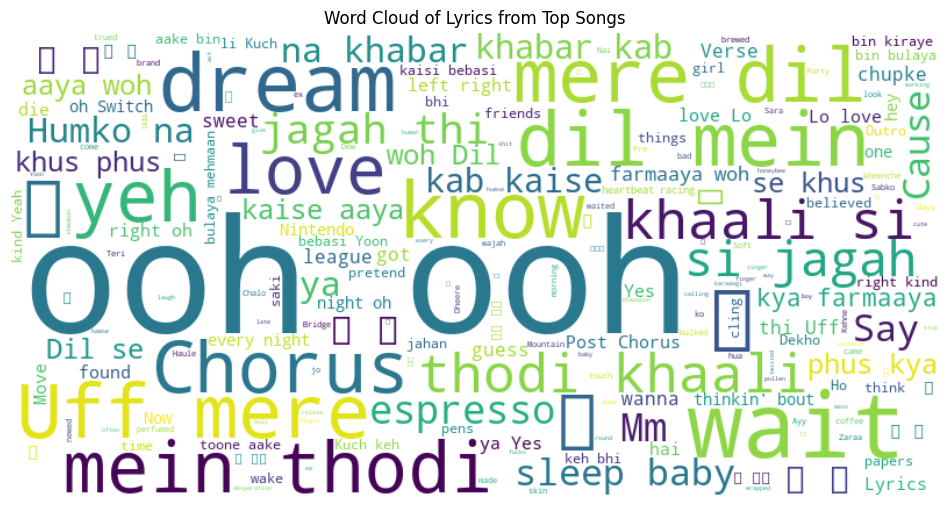

In [41]:
from wordcloud import WordCloud

# Combine all lyrics into one string
all_lyrics = ' '.join(df_top_songs['lyrics'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Lyrics from Top Songs')
plt.show()
